# KNN ()

In [1]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [ ]:
# 데이터 갯수 : sample
#  분류헐 컬럼 : target
#  타겟을 제외한 컬럼명 : feature

# 지도학습 
# - 객관식 (classification)
# - 주관식 (regration)


In [2]:
data1 <- read.csv("Kang_indo_data2.csv")

car_transmission == automatic =1 , manual = 2
car_fuel == diesel = 1, gasoline = 2
car_brand == Kia = 1, Hyundai = 2 , Chervolet = 3, Audi = 4, Mercedes-Benz = 5, BMV = 6
car_model 


In [3]:
data1 


car_brand,car_model,car_price,car_fuel,car_transmission,car_mileage,car_age
<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>
Kia,Seltos,1300000,diesel,automatic,10000,6
Hyundai,Verna,600000,diesel,manual,100000,13
Hyundai,Xcent,550000,gasoline,manual,25000,9
Hyundai,Creta,850000,gasoline,manual,25000,10
Hyundai,Verna,600000,diesel,manual,100000,13
Hyundai,Xcent,550000,gasoline,manual,25000,9
Hyundai,Creta,850000,gasoline,manual,25000,10
Hyundai,Venue,1195000,diesel,manual,5000,6
Hyundai,i10,229999,gasoline,manual,60000,11


In [3]:
# 학습용 데이터와 검증용 데이터 분리
set.seed(1234)
samp <- c(sample(1:50,35),sample(51:100, 35),sample(101:150, 35))
samp

[1]  28  16  22  37  44   9   5  38  49   4  34  39  48  26   6  15  14  40
 [19]  30  24  32  41  29  21   8  20  31   3  50  46   2  35  47  42  12  53
 [37]  73  91  86  58  82  92  93  52  65  88  56  79  95  96  76  67  97  60
 [55]  98  72 100  59  66  90  80  87  99  75  63  85  69  68  89  62 120 141
 [73] 107 132 106 137 127 112 108 101 136 128 119 109 130 117 122 146 121 147
 [91] 113 135 102 133 126 139 131 116 111 104 103 124 110 144 129

In [4]:
# 학습용 데이터 셋
data.tr <- iris[samp,]

# 검증용 데이터 셋
data.test <- iris[-samp,]


In [6]:
summary(data.tr)
summary(data.test)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width         Species  
 Min.   :4.300   Min.   :2.200   Min.   :1.100   Min.   :0.10   setosa    :35  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.30   versicolor:35  
 Median :5.800   Median :3.000   Median :4.300   Median :1.30   virginica :35  
 Mean   :5.847   Mean   :3.042   Mean   :3.749   Mean   :1.19                  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.80                  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.50                  

  Sepal.Length    Sepal.Width     Petal.Length   Petal.Width          Species  
 Min.   :4.400   Min.   :2.000   Min.   :1.00   Min.   :0.100   setosa    :15  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.60   1st Qu.:0.300   versicolor:15  
 Median :5.800   Median :3.100   Median :4.70   Median :1.400   virginica :15  
 Mean   :5.836   Mean   :3.093   Mean   :3.78   Mean   :1.222                  
 3rd Qu.:6.500   3rd Qu.:3.400   3rd Qu.:5.10   3rd Qu.:1.900                  
 Max.   :7.700   Max.   :4.100   Max.   :6.70   Max.   :2.500                  

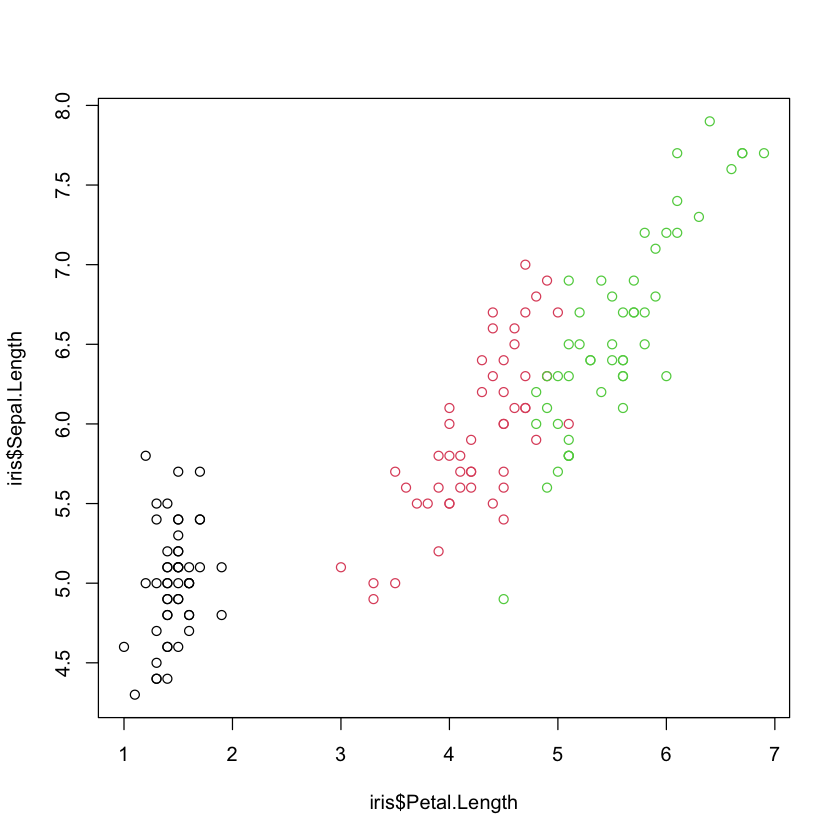

In [12]:
par(bg = 'white')
plot(iris$Petal.Length,iris$Sepal.Length,col = iris$Species)

In [13]:
# Trainig Data 준비
data.training = subset(data.tr, select = -Species)
head(data.training)
data.training.label = data.tr$Species

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
28,5.2,3.5,1.5,0.2
16,5.7,4.4,1.5,0.4
22,5.1,3.7,1.5,0.4
37,5.5,3.5,1.3,0.2
44,5.0,3.5,1.6,0.6
9,4.4,2.9,1.4,0.2


In [14]:
# 문제 및 정답 만들기
x <- subset(data.test, select = -Species)
y <- data.test$Species

# 학습시키기


In [16]:
# model 불러오기 (KNN)
library(class)

In [25]:
# k=3 (Hyper Parameter 조정)
iris_Knn <- knn(train = data.training, test = x, cl = data.training.label, k =3)
class(iris_Knn)

[1] "factor"

In [23]:
# 예측값 과 정답값의 비교
mean(y ==iris_Knn)

[1] 0.9555556

In [24]:
# 정오표 확인
# 틀리는거도 한쪽으로 몰려서 틀리면 안된다 
table(y, iris_Knn)

            iris_Knn
y            setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         13         2
  virginica       0          0        15